# Prototype data generation

In this notebook we will layout an example workflow that can be used with the prototype cubing engine which is the endgoal of MS19 in the BmD project. 

## Setup

In order to utilize the modules that were written for this project we will add the path temporarily to the environment so that we will not need to do a setup

In [2]:
import sys
import os

#Add path to the source code 
src_path = os.path.abspath("../../src")
sys.path.insert(0, src_path)

## Prototype Area of interest

For the prototype we will look at one of the Natura2000 sites in Belgium, the Sonian Forest and the surrounding sites. In the W3 T1 documentation for the BmD project a complete description of this area is given but we will provide a short overview in this notebook as well.

<div style="float: right; width: 50%; margin-left: 15px; text-align: center;">
  <img src="img/AOI.png" alt="Sonian Forest" style="width:100%;">
  <div style="font-size: 90%; color: gray; margin-top: 4px;">
    <em>Figure 1:</em> Sonian Forest and its surrounding Natura2000 areas
  </div>
</div>

<p>
  The Sonian Forest and its surrounding areas are characterized by a set of habitats, which can be found on the 
  <a href="https://natura2000.eea.europa.eu/" target="_blank">Natura2000</a> website. The areas of interest are characterized by:
</p>

<ol>
  <li>
    <strong>La Forêt de Soignes avec lisières et domaines boisés avoisinants et la Vallée de la Woluwe</strong> – 
    <em>complexe Forêt de Soignes - Vallée de la Woluwe</em>
    <ul>
      <li><strong>Area code:</strong> BE1000001</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 5 species & 8 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Sonian Forest</strong>
    <ul>
      <li><strong>Area code:</strong> BE2400008</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 3 species & 9 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Vallées de l'Argentine et de la Lasne</strong>
    <ul>
      <li><strong>Area code:</strong> BE31002C0</li>
      <li><strong>Protected under:</strong> both Birds and Habitats Directives</li>
      <li><strong>Area:</strong> 821.45 ha</li>
      <li><strong>Protected:</strong> 16 species & 14 habitats</li>
    </ul>
  </li>
</ol>
<p>
  Each habitat is characterized by a set of species that are indicative of its health. In total there are 
  <strong>211 species of interest</strong> for this area, which are described within the file 
  <code>prototypeNames.csv</code> located in the prototype script directory under the 
  <code>inp</code> folder.
</p>

<p>
  In addition to this, we also provide a file containing the invasive species that are known within the country. 
  This list, the <em>Global Register of Introduced and Invasive Species - Belgium</em>, can be found on 
  <a href="https://www.gbif.org/dataset/6d9e952f-948c-4483-9807-575348147c7e" target="_blank">GBIF</a> and is 
  accessible as a dataset containing a Darwin Core (DwC) archive.
</p>

In [3]:
#Bbox formatted with long_min, lat_min, long_max, lat_max for the areas of interest
aoi_bbox = (4.171371,50.684060,4.743004,50.877911)
#Path and filename to the species of interest
species_oi_path = "inp"
species_oi_file = "prototypeNames.csv"
#Path and filename to the invasive species
species_inv_path = "inp/dwca-unified-checklist-v1.14"
species_inv_file = "taxon.txt"

## GBIF 

### GBIF data gathering

In this section we will use the functions described in 'src\datasource\gbif.py' to obtain relevant biodiversity data

In [4]:
import datasource as ds

INFO:Note: NumExpr detected 22 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:NumExpr defaulting to 16 threads.


In [18]:
print(ds.gbif.fetch_taxon_info.__doc__)


    A function that reads in a list of species names and than retrieves all the relevant information from
    the GBIF taxonomic backbone. The dataframe containing all the taxonomic data is than formatted to store the taxonKey that is used for the most general
    name within the column 'acceptedUsageKey'.

    Args:
        inp_file (str): The name for the file containing all the species names
        inp_path (str, optional): Path where the input file is stored. The default is empty and will be read from the working directory
        out_file (str): The name for the file to which the taxonomic information will be written to. If nothing is provided than the result will not be saved
        out_path (str, optional): Path where the output file will be stored. The default is empty and will be written to the working directory
        sep (str, optional): Separator used in the input file in between species names
        mismatch_file (str, optional): File where all the mismatched names sh

In [5]:
species_oi_df, mismatch_oi_df = ds.gbif.fetch_taxon_info(species_oi_file, 
                                                         inp_path=species_oi_path,
                                                         out_file="species_oi.csv",
                                                         out_path="out",
                                                         mismatch_file="species_mm.csv",
                                                         keep_higherrank=False)

'NONE' and 'HIGHERRANK' matches encountered while searching through the GBIF taxonomic backbone:
The following lookup names (Carex sp., Chara sp, Lotus uliginosus, Salix alba, Lathyrus montanus, Ranunculus nemorosus) resulted in 'NONE' or 'HIGHERRANK' type match. Potential reasons can be found in the mismatch_df under the key 'note'


C:\Users\niels\Documents\Repositories\BmC\src\datasource\gbif.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxonomic_df["acceptedUsageKey"].fillna(taxonomic_df["usageKey"], inplace=True)


In [7]:
species_oi_keys = species_oi_df["acceptedUsageKey"].values
species_oi_keys

array([ 5371818,  5369701,  2876213,  5329266,  2723315,  9213153,
        7277865,  5385604,  3113777,  7589456,  3034620,  2721897,
        2676091,  5341478,  2721983,  5289877,  2685484,  2681729,
        2475532,  7903764,  2726592,  3172427,  3033266,  9444556,
        3113650,  3033377,  7960979,  5331355,  3133702,  2729081,
        2888808,  7972010,  4567182,  2926683, 11071158,  3152047,
        2878826,  3152379,  7459211,  5403296,  3033665,  4149465,
        2687943,  8848598,  5410564,  5284884,  3085811,  5743122,
        2914642,  5405976,  2701418,  3189172,  5371808,  2681714,
        2878688,  3137498,  9490132,  7297904,  5333408,  3188736,
        3039454,  2951998,  5371889,  2890668,  2676491,  3136606,
        7693914,  5329192,  3054168,  2706163,  3113784,  5388835,
        5414992,  2724609,  2739622,  2700934,  4109084,  5301141,
        5365576,  2914547,  2650133,  5290081,  6027388,  5331916,
        8925249,  2873896,  5347571,  4932232,  5333411,  5366

In [8]:
species_inv_keys = ds.gbif.extract_keys_dwc(species_inv_file, inp_path=species_inv_path)
species_inv_keys

['1002621',
 '1003567',
 '10071055',
 '1007534',
 '1008610',
 '1008612',
 '1008955',
 '1010644',
 '10108775',
 '1013526',
 '1014565',
 '1016841',
 '1017419',
 '10269496',
 '1031394',
 '1031400',
 '1031512',
 '1031520',
 '1031524',
 '1031564',
 '1031677',
 '1031680',
 '1031684',
 '1031685',
 '1031737',
 '1031742',
 '1031743',
 '1032262',
 '1032377',
 '10329298',
 '10411852',
 '1043717',
 '1043978',
 '1045323',
 '1047536',
 '10545407',
 '10578411',
 '10629881',
 '10646747',
 '10676000',
 '10701161',
 '10730110',
 '10755213',
 '10773250',
 '10786206',
 '10797854',
 '10800064',
 '10801424',
 '10852031',
 '10857535',
 '10902460',
 '10920460',
 '10933479',
 '10937982',
 '10944522',
 '10948891',
 '10953644',
 '1095946',
 '10966302',
 '10972541',
 '10986555',
 '11007246',
 '11055820',
 '11064584',
 '11104870',
 '11107889',
 '1111797',
 '11136683',
 '11141765',
 '11162940',
 '1119292',
 '11205618',
 '11335341',
 '1133603',
 '1152186',
 '11528335',
 '11794300',
 '11844792',
 '11921804',
 '119488

In [9]:
ds.gbif.generate_json_query(species_oi_keys, aoi_bbox, 
                            out_file="gbif_oi_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])
ds.gbif.generate_json_query(species_inv_keys, aoi_bbox, 
                            out_file="gbif_inv_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])

Executing this code will generate .json file that will be stored within the current working directory. This json file can subsequently be used to call the GBIF SQL API through the gbifCube.sh bash script. 
1) Assure that the bash script has the correct permission to be execute from the shell. To check whether the file has the correct permission to execute use the `ls -l gbifCube.sh` command in the shell. If the file has execution permission it should have the `x` character. If the script does not have the right permission on your system use the `chmod +x gbifCube.sh` in your shell
2) In order to run this bash script, GBIF credentials should be added to the `~/.bashrc`
```
EXPORT GBIF_USERNAME = "yourUserName"
EXPORT GBIF_EMAIL = "yourAccountEmail"
EXPORT GBIF_PASSWORD = "yourPassword"
```
3) Execution of the `gbifCube.sh` script will return a message that ends in multidigit string. This multidigit string should subsequently be used to download the files

### GBIF data exploration

In this section we will perform exploration of the queried data obtained from GBIF to determine the timeframe from which we will sample CHELSA data

In [4]:
import pandas as pd

species_df = pd.read_csv("out/species_oi/0089866-250525065834625.csv", delimiter="\t")
species_df.head()

,year,month,decimallatitude,decimallongitude,specieskey,species
0,1865,5,50.751944,4.615833,3054168,Teesdalia nudicaulis
1,1901,4,50.835417,4.284758,2687943,Equisetum telmateia
2,2016,5,50.826630,4.664595,3012167,Sorbus aucuparia
3,2021,5,50.797815,4.390093,2926557,Glechoma hederacea
4,2021,5,50.810650,4.446678,5376075,Alliaria petiolata


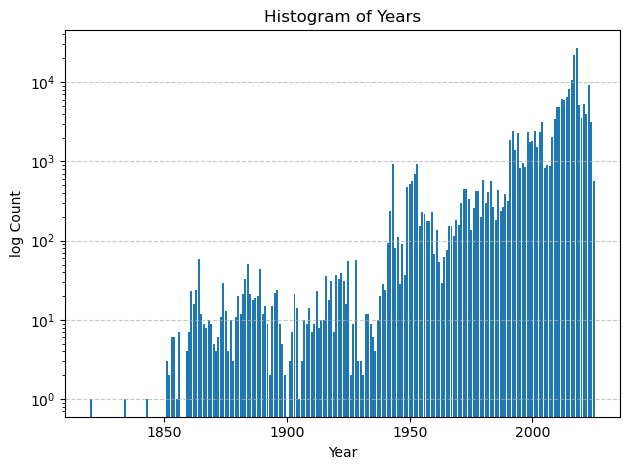

In [8]:
import matplotlib.pyplot as plt
# Count occurrences of each year
year_counts = species_df['year'].value_counts().sort_index()

# Plot as a bar chart
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values, width=0.8, align='center')  # width<1 to avoid overlap

# Logarithmic y-axis
ax.set_yscale('log')

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('log Count')
ax.set_title('Histogram of Years')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### GBIF reprojection and rasterization of the data

The GBIF data itself is not yet in a format that is compatible with remote sensing data and as such we will need to reproject it and bring it to a shared raster with other data